In [283]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Continuous Time ANN

A. Define the Variables

In [284]:
nn=500
dx=1/nn
C=0

B. Train the Weight Matrix

In [285]:
pat=np.floor(2*np.random.rand(nn,10))-0.5
w=np.matmul(pat,np.transpose(pat))
w=w/w[1,1]
w=100*(w-C)

C. Define RNN ODE

In [286]:
def rnn_ode(t,u,flag,nn,dx,w,I_ext):
  #inverse of membrane time constant
  tau_inv=1
  r=1/(1+np.exp(-u))
  sum=np.matmul(w,r)*dx
  udot=tau_inv*(-u+sum+I_ext)
  return udot

D. Update with Localised Input

In [295]:
I_ext = pat[:,1]+0.5
I_ext[0:10] = 1-I_ext[0:10]
sol = solve_ivp(fun=rnn_ode,t_span=(0, 10), y0=np.zeros(nn), args=([], nn, dx, w, I_ext))
t1=sol.t
u1=np.transpose(sol.y)
r1=u1>0

E. Update without Input

In [299]:
I_ext=np.zeros(nn)
sol = solve_ivp(fun=rnn_ode,t_span=(10,20), y0=u1[u1.shape[0]-1,:], args=([], nn, dx, w, I_ext))
t2=sol.t
u2=sol.y
r2=np.transpose(u2)>0
t=np.concatenate((t1,t2))
r=np.concatenate((r1,r2))

F. Plot the Results

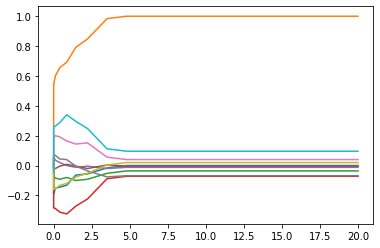

In [300]:
plt.plot(t,4*np.matmul((r-0.5),pat/nn))
plt.show()